In [10]:
from sklearn.datasets import fetch_20newsgroups

from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.stem.snowball import SnowballStemmer
import re
from string import punctuation

import numpy as np
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

In [13]:
from latent_topic_script import clean_stemmed_doc, topic_modeling, top_terms, top_latent_topics

In [4]:
#########  GET and CLEAN THE DATA
print('Get data')
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'))
data = newsgroups_train.data
full_labels = newsgroups_train.filenames
labels = [label.split('/')[-2] for label in full_labels]

snowball = SnowballStemmer('english')
regex = re.compile('[%s]' % re.escape(punctuation))

print('Clean data')
clean_data_snow = map(lambda doc: clean_stemmed_doc(doc, regex, snowball), data)

Get data
Clean data


In [5]:
#########  From TEXT to VECTOR
print('Apply vectorizer')
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

sparse_vectors = tfidf_vectorizer.fit_transform(clean_data_snow)
vectors = sparse_vectors.toarray()
words = tfidf_vectorizer.get_feature_names()

Apply vectorizer


In [9]:
##########  Define LATENT TOPICS
print('Define latent topics')
n_components = 20
W,H,nmf = topic_modeling(n_components, vectors)
print '-'*20
print 'Looking at {} topics.'.format(n_components)
print '-'*20
d = {}
list_terms = top_terms(H,words)
list_topics = []
for lst in list_terms:
    print lst
    label = raw_input('What label do you want to set? ')
    list_topics.append(label)
print '\n'
print '-'*10
print list_topics
print '\n' + '*'*50

Define latent topics
--------------------
Looking at 20 topics.
--------------------
[u'don' u'just' u'think' u'like' u'say' u'thing' u'peopl' u'want' u'whi'
 u'know']
What label do you want to set? opinion
[u'use' u'port' u'printer' u'modem' u'mac' u'widget' u'font' u'serial'
 u'devic' u've']
What label do you want to set? printer
[u'game' u'team' u'play' u'player' u'year' u'win' u'season' u'score'
 u'hockey' u'leagu']
What label do you want to set? sports
[u'key' u'chip' u'encrypt' u'clipper' u'escrow' u'secur' u'phone'
 u'algorithm' u'govern' u'nsa']
What label do you want to set? computer security
[u'drive' u'disk' u'scsi' u'hard' u'floppi' u'ide' u'control' u'boot'
 u'format' u'cd']
What label do you want to set? computer hardware
[u'thank' u'ani' u'appreci' u'advanc' u'hi' u'help' u'info' u'inform'
 u'look' u'need']
What label do you want to set? help
[u'geb' u'cadr' u'pitt' u'dsl' u'chastiti' u'intellect' u'gordon'
 u'surrend' u'skeptic' u'shame']
What label do you want to set? 

In [14]:
d = top_latent_topics(W, list_topics)
over_dict = {}
for label in set(labels):
    d_count = defaultdict(int)
    mask = (np.array(labels) == label)
    indices = np.array(range(len(labels)))[mask]
    for index in indices:
        for topic,value in d[index]:
            if topic != 'others':
                d_count[topic] += value/100.0
    over_dict[label] = d_count

In [15]:
dim_1 = over_dict.keys()
dim_2 = over_dict[dim_1[0]].keys()

In [17]:
matrix = []
for label_1 in dim_1:
    vect = []
    for label_2 in dim_2:
        vect.append(over_dict[label_1][label_2])
    matrix.append(vect)
counts = np.array(matrix)

In [25]:
def make_list_topics(n_components = 20):
    ##########  Define LATENT TOPICS
    print('Define latent topics')

    W,H,nmf = topic_modeling(n_components, vectors)
    print '-'*20
    print 'Looking at {} topics.'.format(n_components)
    print '-'*20
    list_terms = top_terms(H,words)
    list_topics = []
    for lst in list_terms:
        print lst
        label = raw_input('What label do you want to set? ')
        list_topics.append(label)
    print '\n'
    print '-'*10
    print list_topics
    print '\n' + '*'*50
    return W, H, nmf, list_topics

In [20]:
def heat_map(W, list_topics):
    d = top_latent_topics(W, list_topics)
    over_dict = {}
    for label in set(labels):
        d_count = defaultdict(int)
        mask = (np.array(labels) == label)
        indices = np.array(range(len(labels)))[mask]
        for index in indices:
            for topic,value in d[index]:
                if topic != 'others':
                    d_count[topic] += value/100.0
        over_dict[label] = d_count

    dim_1 = over_dict.keys()
    dim_2 = over_dict[dim_1[0]].keys()

    matrix = []
    for label_1 in dim_1:
        vect = []
        for label_2 in dim_2:
            vect.append(over_dict[label_1][label_2])
        matrix.append(vect)
    counts = np.array(matrix)
    df_counts = pd.DataFrame(counts)
    df_counts.columns = dim_2
    df_counts.index = dim_1
    ax = sns.heatmap(df_counts)
    return ax

In [22]:
W, H, nmf, list_topics = make_list_topics(n_components = 20)

Define latent topics
--------------------
Looking at 20 topics.
--------------------
[u'don' u'think' u'peopl' u'just' u'like' u'say' u'thing' u'gun' u'whi'
 u'make']
What label do you want to set? opinion
[u'use' u'port' u'printer' u'modem' u'widget' u'mac' u'font' u'serial'
 u'devic' u've']
What label do you want to set? printer
[u'game' u'team' u'play' u'player' u'year' u'win' u'season' u'score'
 u'hockey' u'leagu']
What label do you want to set? sports
[u'key' u'chip' u'encrypt' u'clipper' u'escrow' u'secur' u'phone' u'govern'
 u'algorithm' u'public']
What label do you want to set? computer security
[u'drive' u'disk' u'scsi' u'hard' u'floppi' u'ide' u'control' u'boot'
 u'format' u'cd']
What label do you want to set? computer hardware
[u'thank' u'ani' u'appreci' u'advanc' u'hi' u'help' u'info' u'inform'
 u'look' u'need']
What label do you want to set? help
[u'geb' u'cadr' u'pitt' u'dsl' u'chastiti' u'intellect' u'gordon'
 u'surrend' u'skeptic' u'shame']
What label do you want to set

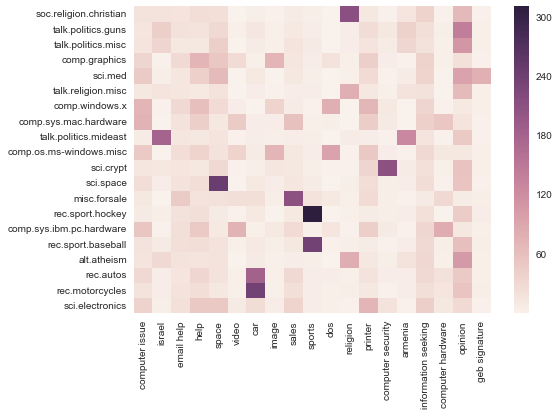

In [23]:
heat_map(W, list_topics)

In [26]:
W_10, H_10, nmf_10, list_topics_10 = make_list_topics(n_components = 10)

Define latent topics
--------------------
Looking at 10 topics.
--------------------
[u'just' u'like' u'don' u'think' u'car' u'good' u'time' u'thing' u've'
 u'use']
What label do you want to set? opinion
[u'window' u'use' u'driver' u'card' u'run' u'dos' u'problem' u'program'
 u'version' u'display']
What label do you want to set? computer
[u'game' u'team' u'play' u'player' u'year' u'win' u'season' u'score'
 u'hockey' u'leagu']
What label do you want to set? sports
[u'key' u'chip' u'encrypt' u'use' u'clipper' u'escrow' u'secur' u'phone'
 u'algorithm' u'govern']
What label do you want to set? computer security
[u'drive' u'disk' u'scsi' u'card' u'hard' u'control' u'floppi' u'ide'
 u'mac' u'bus']
What label do you want to set? computer hardware
[u'thank' u'pleas' u'anyon' u'mail' u'ani' u'doe' u'know' u'appreci'
 u'advanc' u'email']
What label do you want to set? email help
[u'geb' u'cadr' u'pitt' u'dsl' u'chastiti' u'intellect' u'gordon'
 u'surrend' u'skeptic' u'shame']
What label do you w

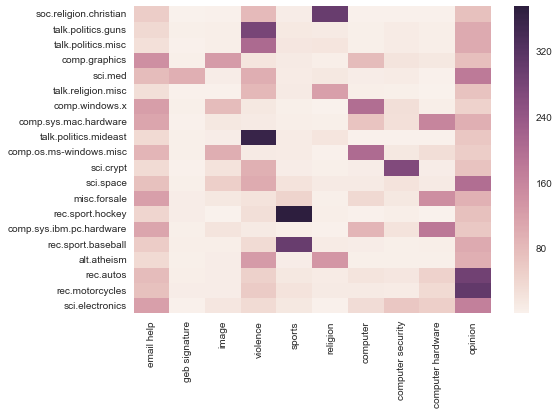

In [27]:
heat_map(W_10, list_topics_10)